In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:

%matplotlib inline

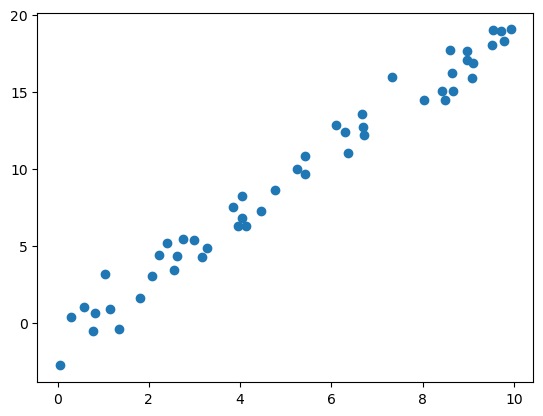

In [3]:
rng = np.random.RandomState(43)
x = 10 * rng.rand(50)
y = 2* x-1 + rng.randn(50)
plt.scatter(x,y);

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [11]:
X = x[:, None]
X.shape

(50, 1)

In [12]:
model.fit(X, y)

LinearRegression()

In [13]:
model.coef_

array([2.01683924])

In [14]:
model.intercept_

-1.0244613189684877

In [17]:
xfit = np.linspace(-1, 11, 50)
Xfit = xfit[:, None]
Xfit.shape

(50, 1)

In [18]:
yfit = model.predict(Xfit)

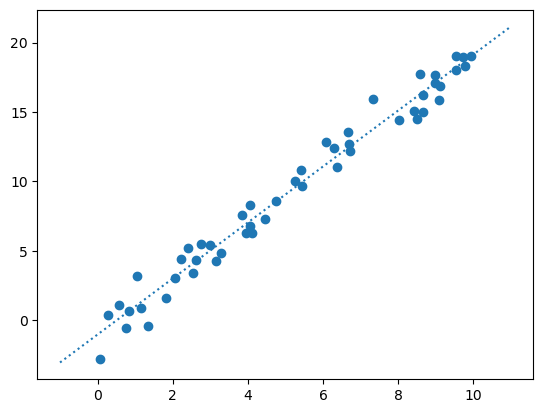

In [24]:
plt.scatter(x, y)
plt.plot(xfit, yfit, ':');

In [25]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [27]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

In [28]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
yhat = model.predict(Xtest)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, yhat)

0.9736842105263158

In [35]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


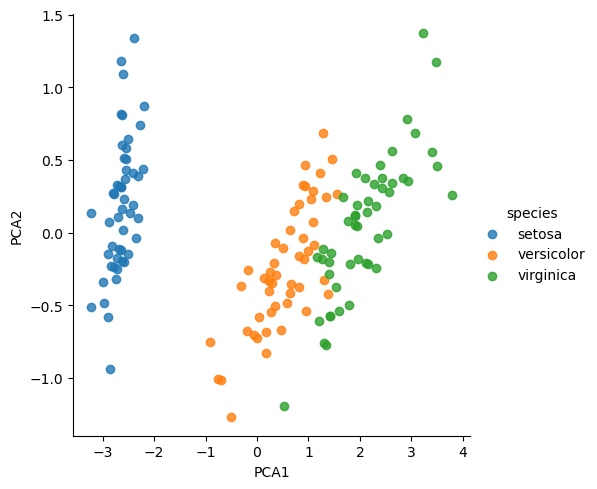

In [36]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot(data=iris, x='PCA1', y='PCA2', hue='species', fit_reg=False);

In [40]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3,
                        covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

c:\Users\matte\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


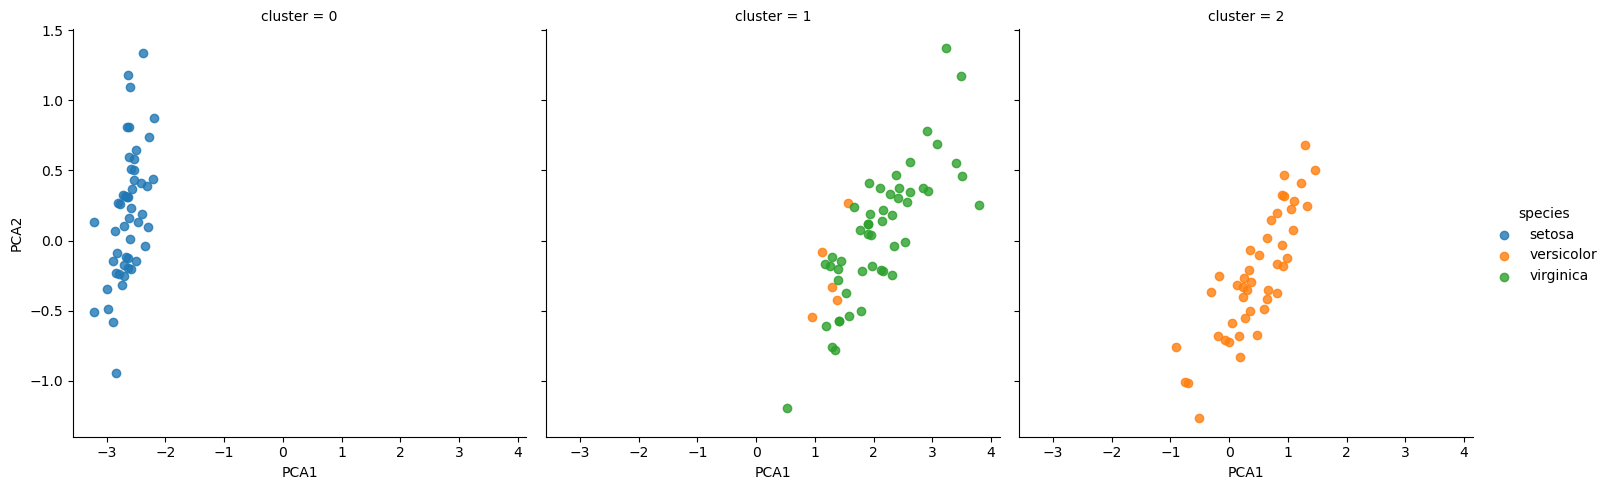

In [42]:
iris['cluster'] = y_gmm
sns.lmplot(data=iris, x="PCA1", y="PCA2", hue='species',
           col='cluster', fit_reg=False);

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

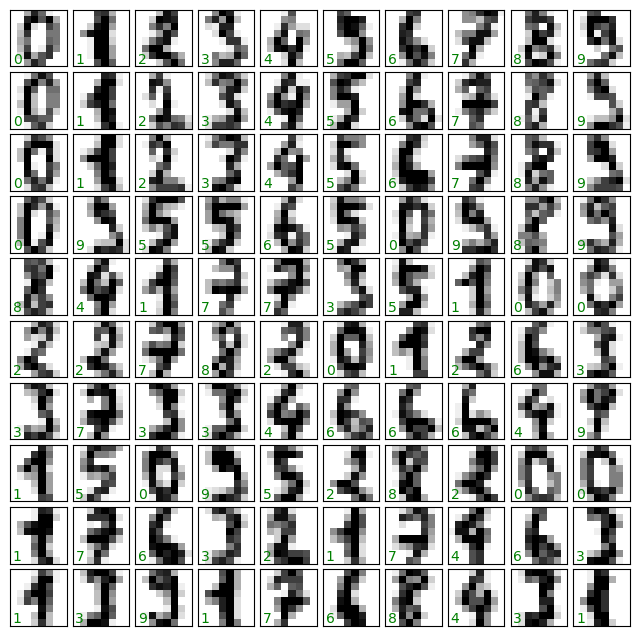

In [44]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [45]:
X = digits.data
X.shape

(1797, 64)

In [46]:
y = digits.target
y.shape

(1797,)

In [47]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

c:\Users\matte\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\matte\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

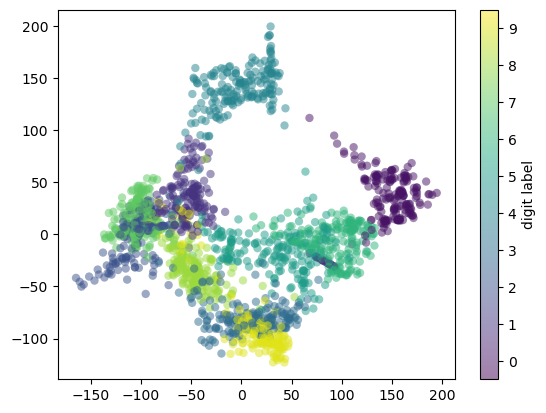

In [54]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [55]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [56]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [57]:
accuracy_score(ytest, y_model)

0.8333333333333334

In [62]:
mat

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]], dtype=int64)

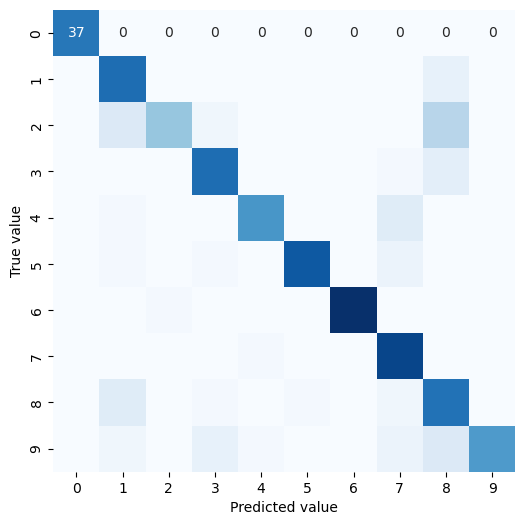

In [67]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
plt.figure(figsize=(8, 6))
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="Blues", fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('True value');

In [70]:
print("Seaborn version:", sns.__version__)

Seaborn version: 0.12.2
